In [28]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import RidgeCV
from sklearn.svm import LinearSVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from matplotlib import pyplot

In [29]:
# read in data
abalone = pd.read_csv('C:\\Users\\chris\\OneDrive\\Grad School\\_ADVANCED MACHINE LEARNING\\Week 3\\Practice Activity #1 - Bagging\\abalone.csv')
abalone.head()

,sex,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [30]:
# Split Predictor vs Target variables
X = abalone.loc[:, abalone.columns != 'rings']
X = X.loc[:, X.columns != 'sex']
y = abalone.loc[:, abalone.columns == 'rings']

# change target variable to integer
y = y.astype({"rings": int})

### Stacking Model 1

In [31]:
estimators = [
     ('lr', RidgeCV()),
     ('svr', LinearSVR(random_state=42)),
     ('cart', DecisionTreeRegressor()),
     ('rf', RandomForestRegressor(min_samples_split = 25))
 ]

reg = StackingRegressor(
     estimators=estimators,
     final_estimator=LinearRegression()
)

In [32]:
# split into training and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
     X, y, random_state=42)

reg.fit(X_train, y_train).score(X_test, y_test)

0.5577790277966577

### Stacking Model 2

In [33]:
# get a stacking ensemble of models
def get_stacking():
    # define the base models
    level0 = list()
    level0.append(('knn', KNeighborsRegressor()))
    level0.append(('cart', DecisionTreeRegressor(min_samples_split = 25)))
    level0.append(('svm', SVR()))
    level0.append(('lr', LinearRegression()))
    # define meta learner model
    level1 = LinearRegression()
    # define the stacking ensemble
    model = StackingRegressor(estimators=level0, final_estimator=level1, cv=5)
    return model

In [34]:
# get a list of models to evaluate
def get_models():
    models = dict()
    models['knn'] = KNeighborsRegressor()
    models['cart'] = DecisionTreeRegressor()
    models['svm'] = SVR()
    models['lr'] = LinearRegression()
    models['stacking'] = get_stacking()
    return models

In [35]:
# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
	cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
	scores = cross_val_score(model, X, y, scoring='explained_variance', cv=cv, n_jobs=-1, error_score='raise')
	return scores

>knn 0.510 (0.035)
>cart 0.108 (0.105)
>svm 0.547 (0.031)
>lr 0.517 (0.044)
>stacking 0.563 (0.034)


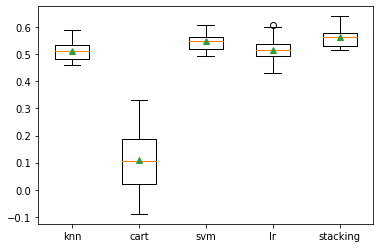

In [36]:
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model, X, y)
	results.append(scores)
	names.append(name)
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()